<a href="https://colab.research.google.com/github/ykitaguchi77/chatGPT/blob/main/Google_GEMINI_Pro_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Google Gemini pro**

https://note.com/alexweberk/n/ncb5ee68333d9

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 11.0 MB/s eta 0:00:00


In [2]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
# APIの設定

from google.colab import drive
drive.mount("/content/drive")

with open("/content/drive/MyDrive/Deep_learning/api.txt") as file:
    #text = file.read()
    i=1
    key = []
    while True:
        include_break_line = file.readline() #改行が含まれた行
        line = include_break_line.rstrip() #改行を取り除く
        if line: #keyの読み込み
            #print(f'{i}行目：{line}')
            key.append(line)
            i += 1
        else:
            break

# APIキーの準備
# #ngrok_aceess_token = key[5]
#openai_api_key = key[3]
# deepl_auth_key = key[1]
# serp_api_key = key[7]

import os
os.environ["OPENAI_API_KEY"] = key[3]
os.environ["SERPAPI_API_KEY"] = key[7]
os.environ["GOOGLE_API_KEY"] = key[11]
os.environ["GEMINI_API_KEY"] = key[19]

# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
genai.configure(api_key=os.environ["GEMINI_API_KEY"])

Mounted at /content/drive


#**Use GEMINI Pro**

In [4]:
model = genai.GenerativeModel('gemini-pro')

In [5]:
response = model.generate_content("眼形成医の悩みを10個挙げて下さい。", stream=True)
for chunk in response:
  print(chunk.text)
  print("_"*80)

1. 眼の解剖学的構造の複雑さによる手術の難しさ
________________________________________________________________________________

2. 手術の成功率や安全性の維持
3. 患者の期待に応えるための技術の向上
4. 眼科治療における
________________________________________________________________________________
進歩に対応するための学習と教育
5. 医療費や保険の制限による経済的な課題
6. 長時間の手術や顕微鏡の使用による肉体的疲労やストレス
7. 患者との効果的なコミュニケーションと信頼関係の構築
8. 医療訴訟や事故のリスク
9
________________________________________________________________________________
. 手術室や機材のメンテナンスや更新にかかる費用
10. 手術の成功を左右するチームワークの構築と維持
________________________________________________________________________________


#**Use GEMINI Pro Vision**

In [6]:
model = genai.GenerativeModel('gemini-pro-vision')

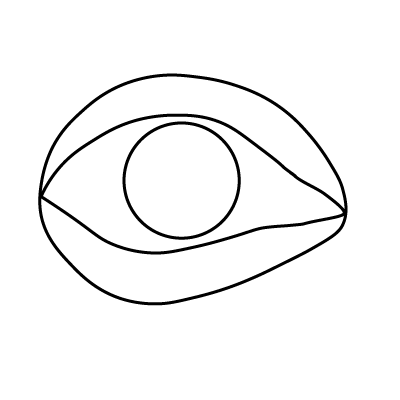

In [7]:
from PIL import Image
image_path = "/content/drive/MyDrive/Artworks/Ophthalmology/診察用.png"
img = Image.open(image_path)
img

In [ ]:
from PIL import Image

#image_path = "/content/drive/MyDrive/Artworks/Ophthalmology/診察用.png"
image_path = "/content/drive/MyDrive/Blepharoplasty_HR/スクリーンショット 2023-04-20 8.35.32-topaz.png"
new_width = 640

#resize image
img = Image.open(image_path)

#透過を削除（Geminiが読めないので）
if img.mode == 'RGBA':
    img = img.convert('RGB')

new_height = int((new_width / img.size[0]) * img.size[1])
img = img.resize((new_width, new_height), Image.ANTIALIAS)

img

In [12]:
#画像だけを送ると英語の説明が返ってくる

response = model.generate_content(img)

to_markdown(response.text)

>  The image shows a patient with anophthalmia, or the absence of an eye. The patient is being fitted with a prosthetic eye. The prosthetic eye is made of a soft, flexible material that is custom-molded to fit the patient's eye socket. The prosthetic eye is held in place by the patient's natural muscles and tissues.

In [13]:
# プロンプトと画像セットで送ると説明が返ってくる
prompt = "Is this right eye or left eye? Also please explain how you determined in detail step be step."
response = model.generate_content([prompt, img])
to_markdown(response.text)



>  The image is of the left eye. This can be determined by the position of the ruler. The ruler is on the right side of the image, which means that it is measuring the distance from the left eye to the right.

In [16]:
prompt = "画像から得られる知見を日本語で詳細にまとめてください。"
response = model.generate_content([prompt, img])
to_markdown(response.text)

>  これは眼瞼下垂の手術をしている画像です。眼瞼下垂とは、上まぶたが垂れ下がって視野が狭くなる病気です。手術は、垂れ下がったまぶたを持ち上げるために、まぶたの裏側にある筋肉を縫い縮める方法で行われます。この手術は、局所麻酔で行うことができ、日帰りで帰ることができます。手術後の経過は良好で、まぶたが持ち上がり、視野が広くなりました。